In [1]:
# import matplotlib
import matplotlib.pyplot as plt

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

#import numpy
import numpy as np

# from sklearn import make_blobs
from sklearn.datasets import make_blobs

# import DBSCAN
from sklearn.cluster import DBSCAN

## Task: Generate clusters with make_blobs function 

* use this settings:
    * n_samples=150,
    * n_features=2,
    * centers=3,
    * cluster_std=0.6,
    * random_state=0

In [2]:
# generate clusters 
X, y = make_blobs(n_samples=150,
                  n_features=2,
                  centers=3,
                  cluster_std=0.6,
                  random_state=0)


In [3]:
X, y

(array([[ 2.71506328e+00,  1.29082190e+00],
        [ 4.43598630e-01,  3.11530945e+00],
        [ 7.67522789e-01,  4.39759671e+00],
        [ 4.38990142e-01,  4.53592883e+00],
        [ 2.73124907e+00,  2.49704755e-01],
        [ 1.71444449e+00,  5.02521524e+00],
        [ 1.89593761e+00,  5.18540259e+00],
        [ 2.43934644e+00, -7.25099666e-02],
        [-2.24021957e+00,  2.61379245e+00],
        [ 1.86922139e+00,  5.44132083e+00],
        [ 3.35320909e+00,  1.69958043e+00],
        [-1.44553995e-01,  2.28187277e+00],
        [-1.90936623e+00,  2.67951917e+00],
        [ 6.70478769e-01,  4.04094275e+00],
        [-1.84892963e-03,  4.58145668e+00],
        [-2.09357177e+00,  2.67185245e+00],
        [-1.46826903e+00,  3.26765447e+00],
        [ 1.83375842e+00,  7.54036153e-01],
        [-1.60663236e+00,  2.73920773e+00],
        [ 2.03169783e+00,  1.96807561e-01],
        [ 5.72793810e-01,  4.08805543e+00],
        [ 2.51834185e+00,  1.39176615e+00],
        [ 1.16411070e+00,  3.791

* plot data points

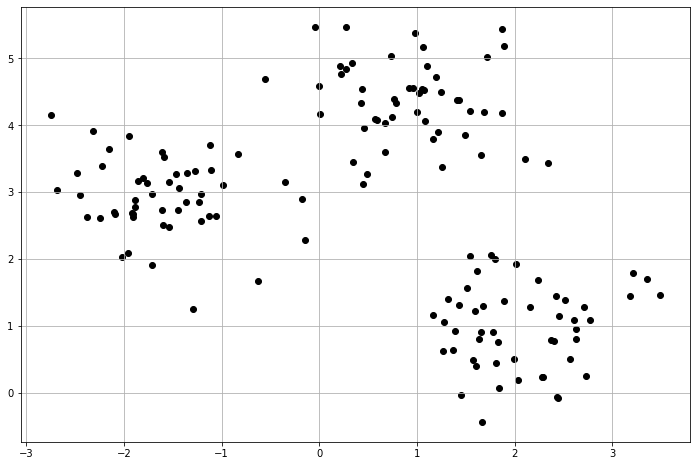

In [4]:
# plot clusters
plt.scatter(X[:,0],
            X[:,1],
            c='black',
            marker='o')
plt.grid()
plt.show()

* define function plot_clusters

In [5]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

## Objective: 
Try to find optimal settings of `eps` and `min_samples` params of DBSCAN. You can iterate over multiple parameters combinations and plot the clustering results.

* define params space

In [6]:
# The domain for eps will be radii and the domain for min_samples will be sizes.

radii = np.linspace(0.1, 1, 10)
sizes = np.arange(2, 11)



* Fit different DBScans with combinations from previous params space (hint: use 'product' function from 'intertools')
* Plot clusters for every combination

In [7]:
from itertools import product

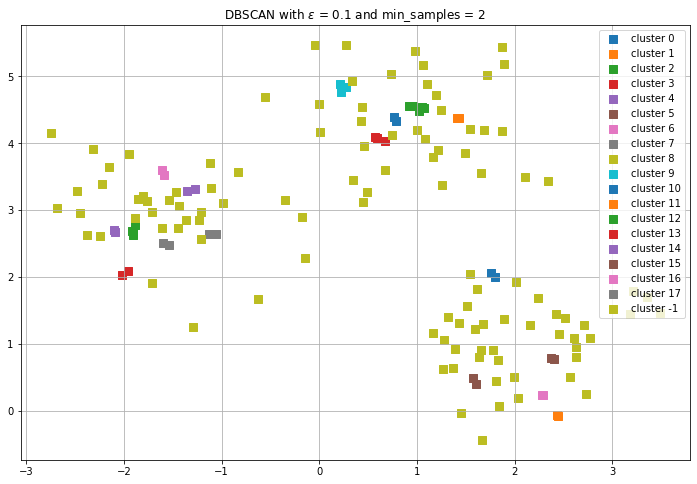

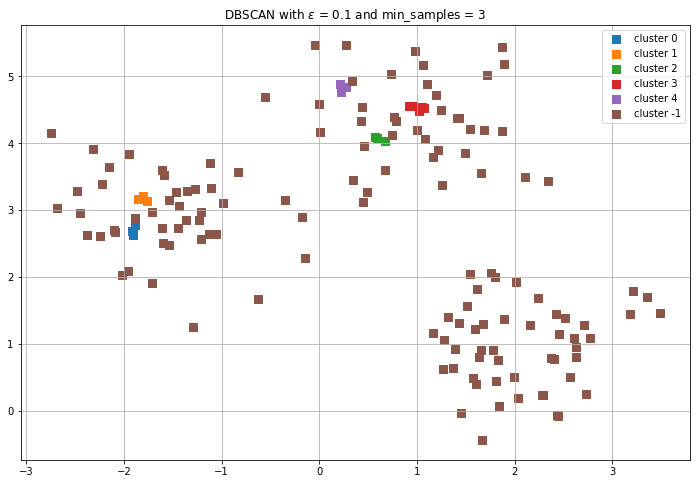

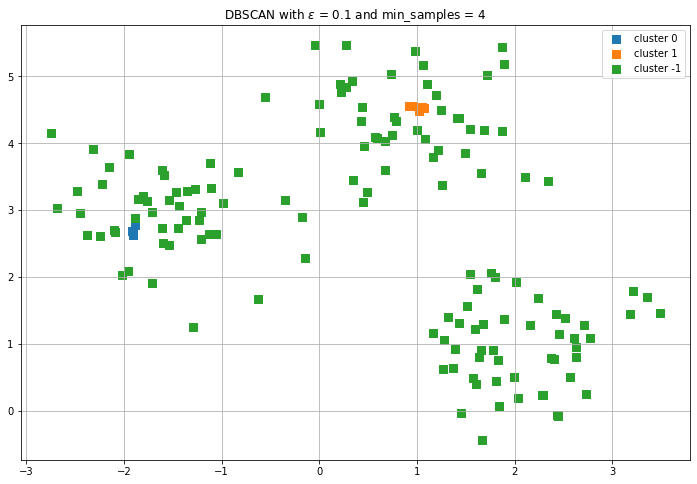

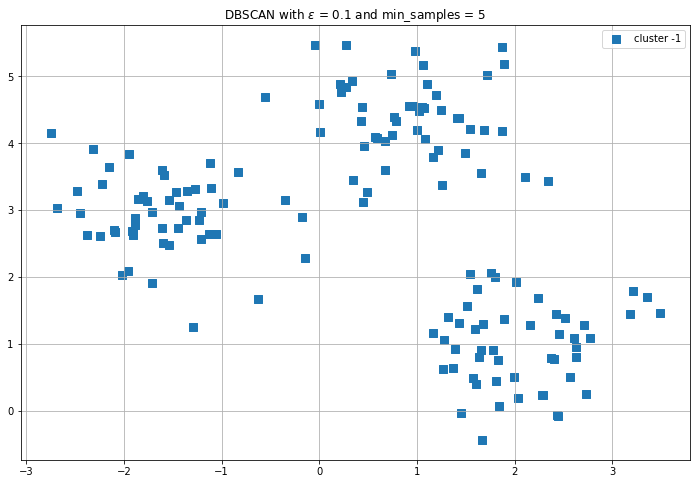

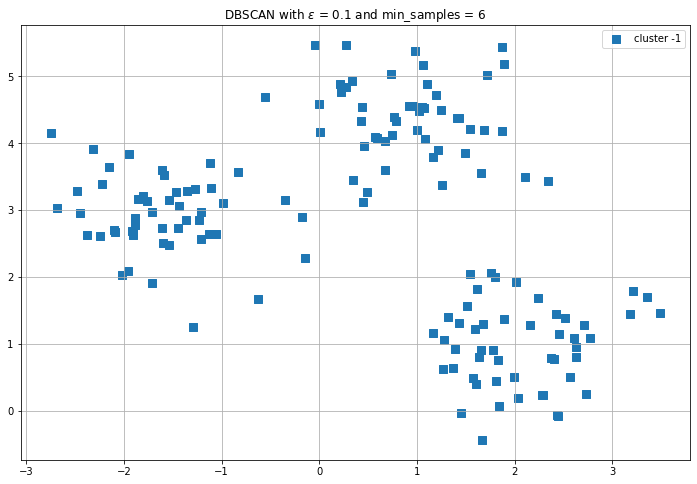

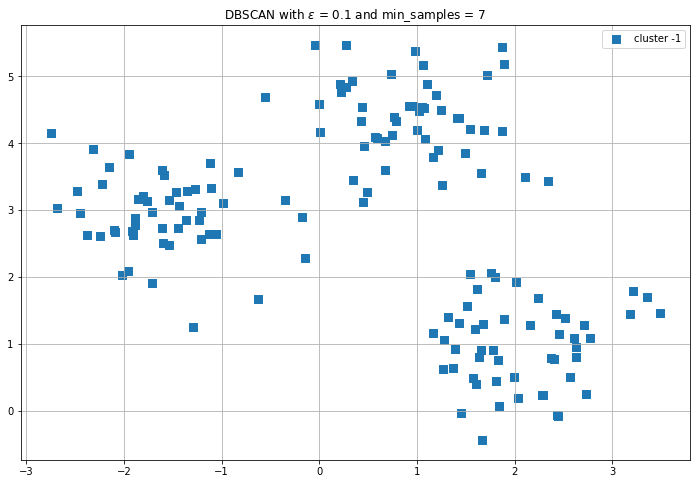

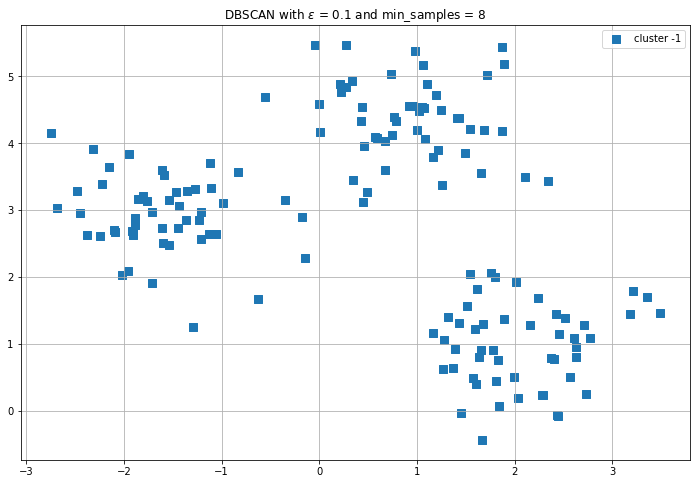

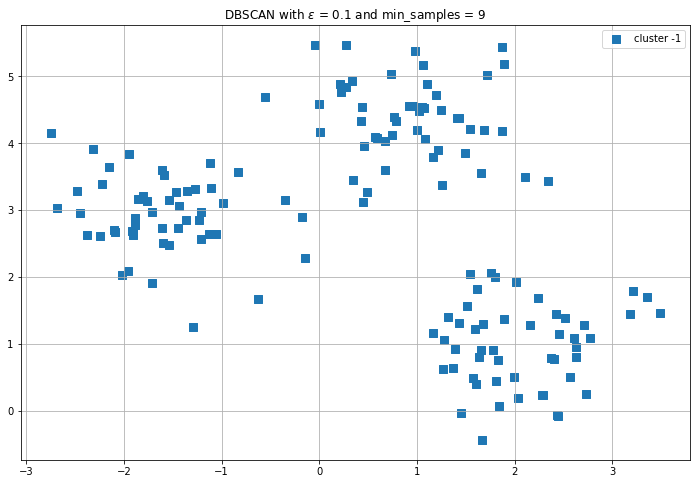

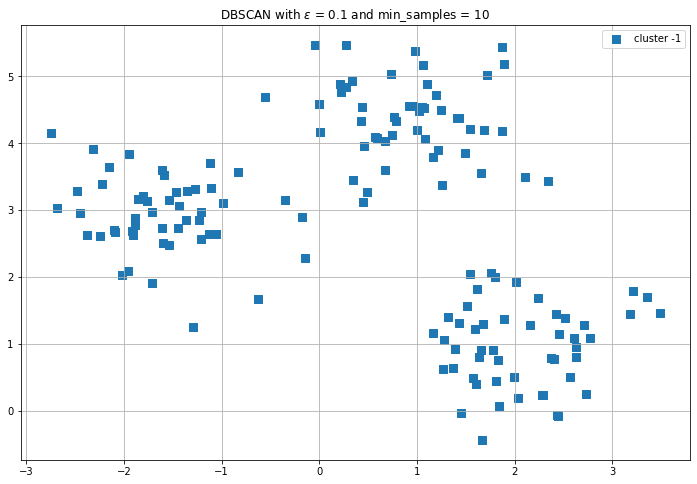

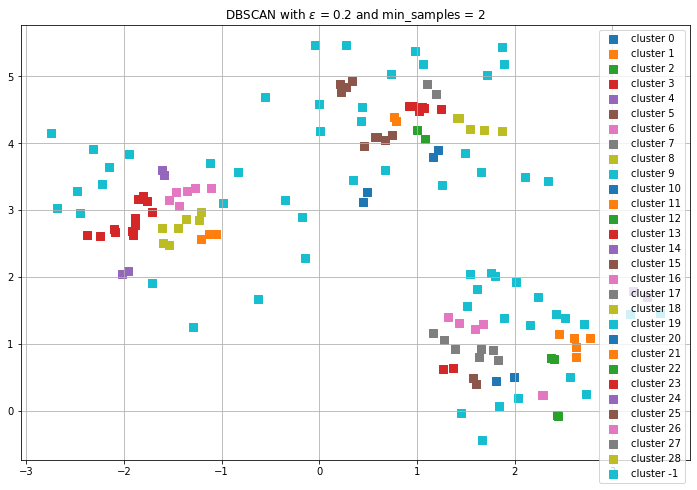

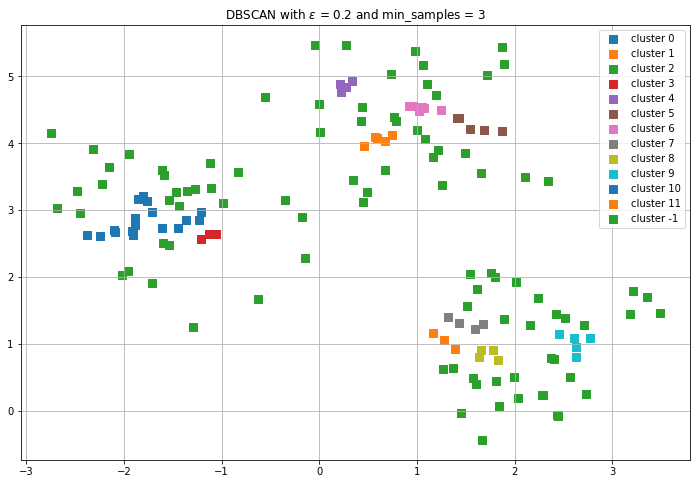

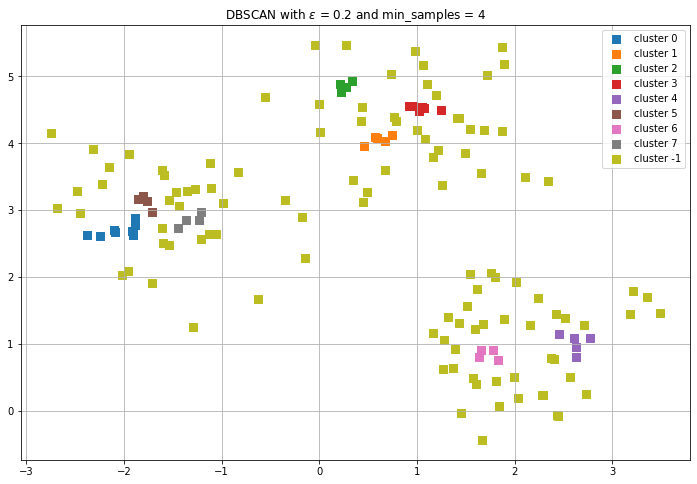

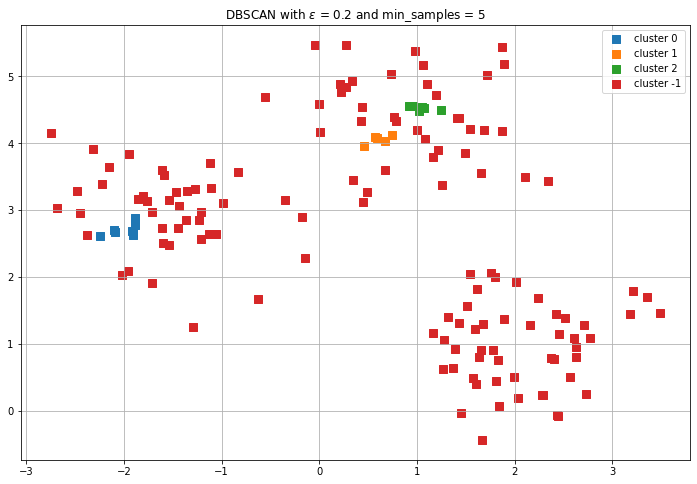

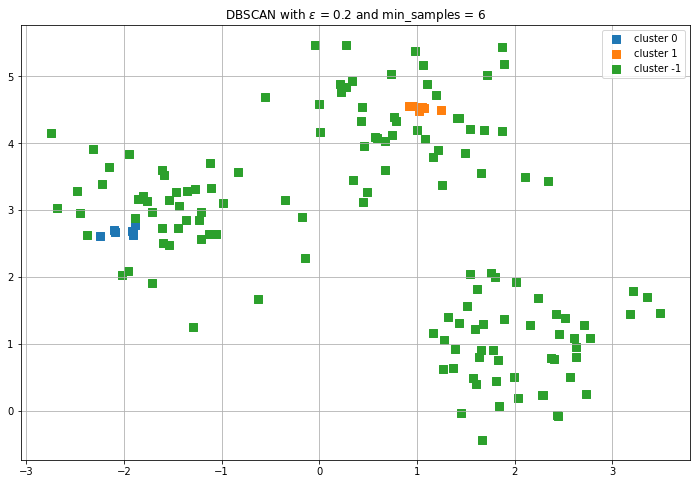

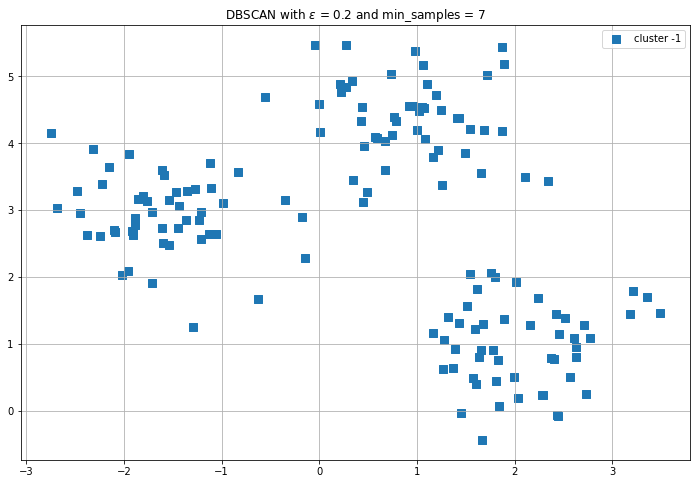

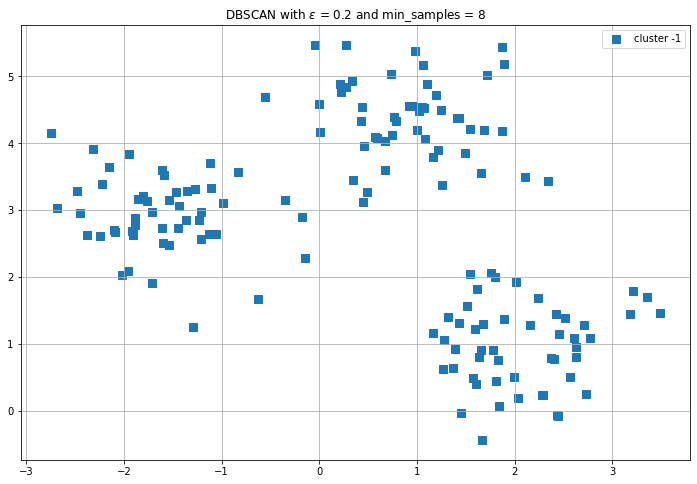

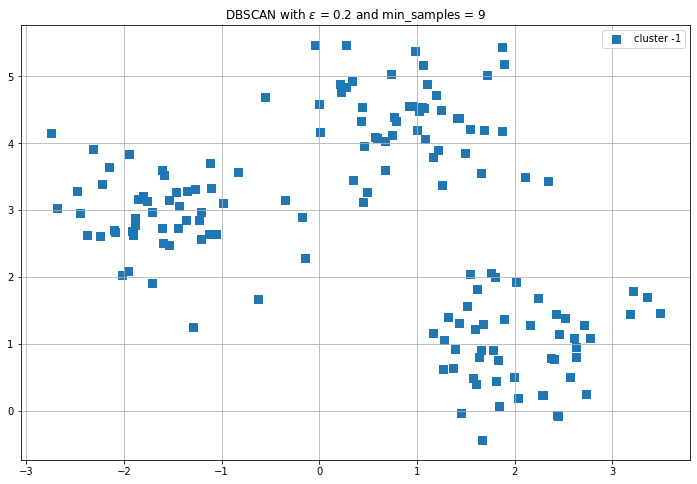

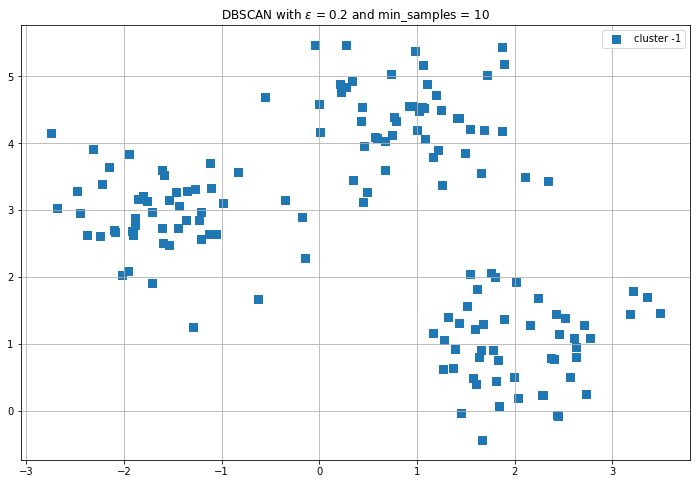

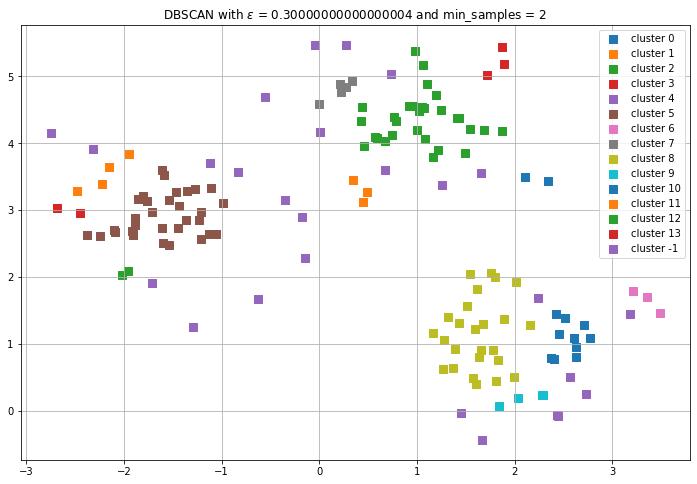

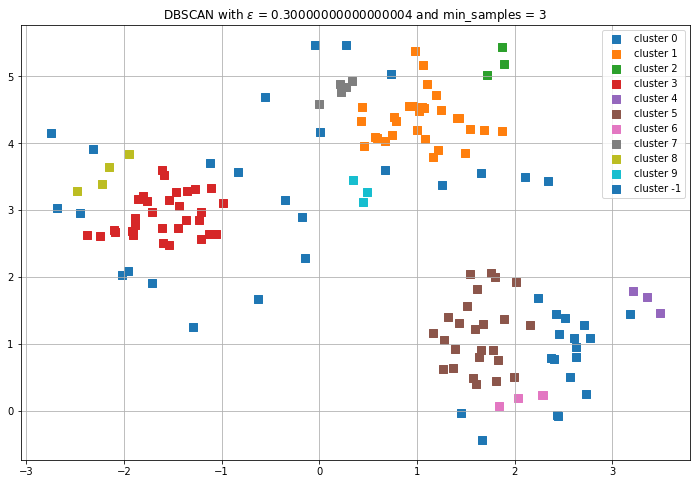

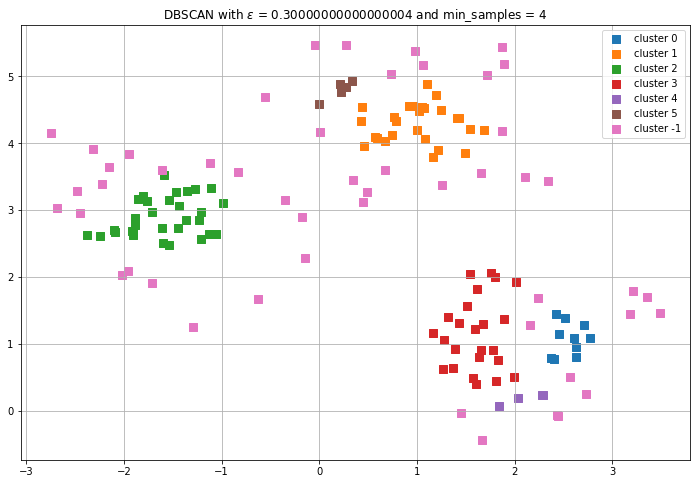

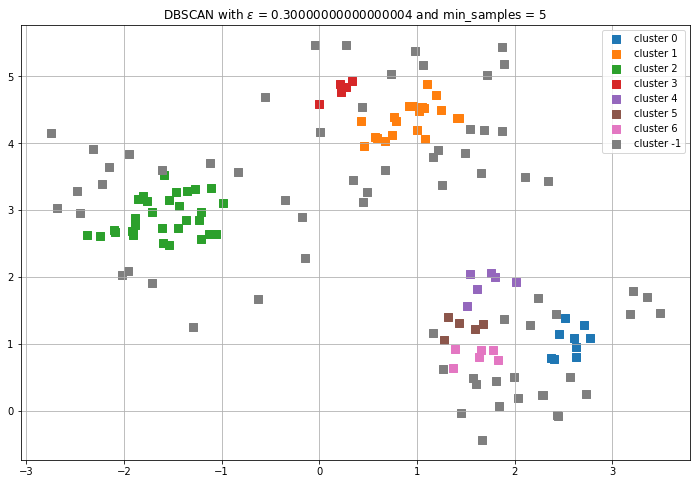

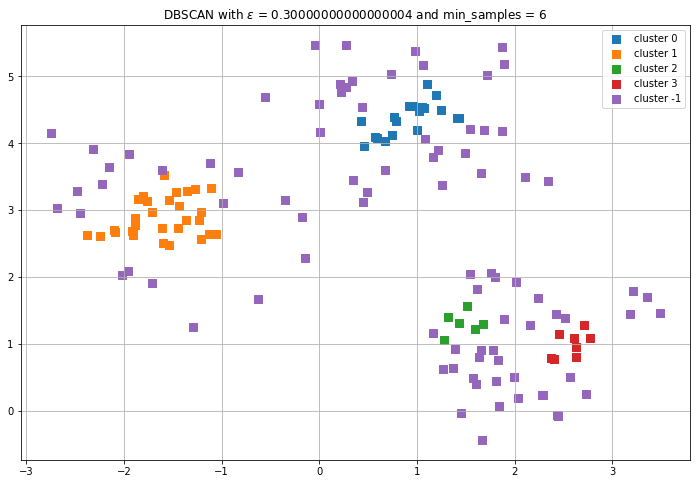

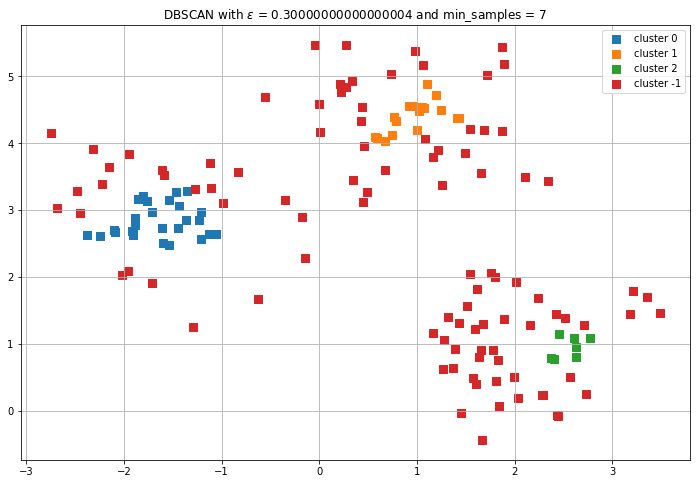

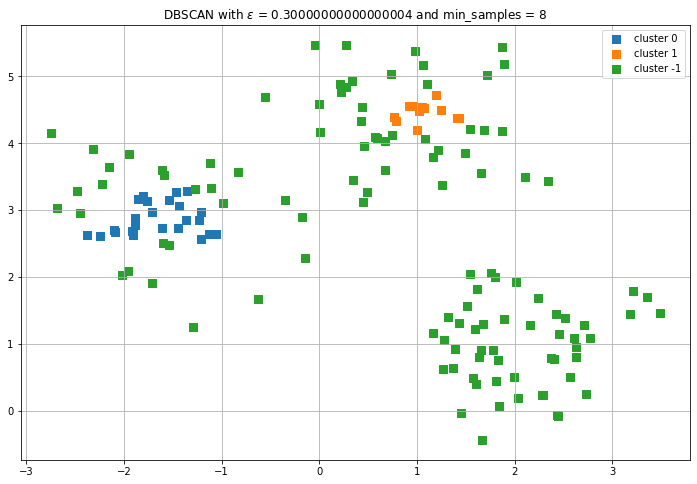

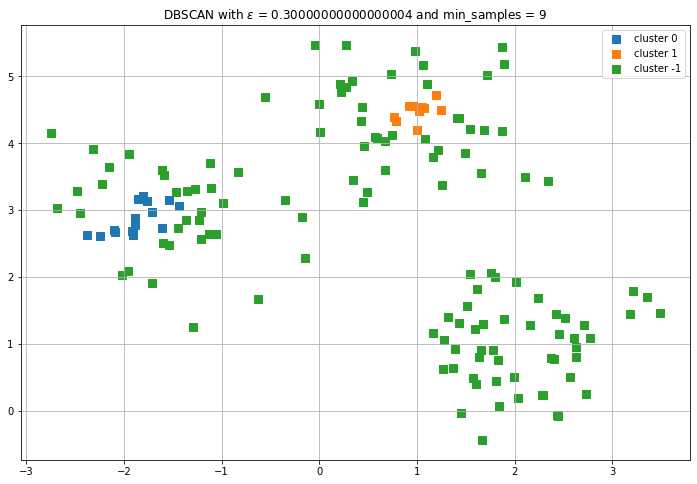

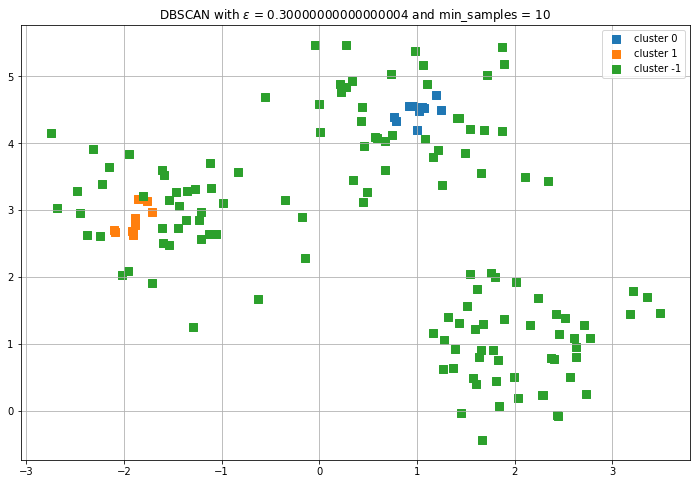

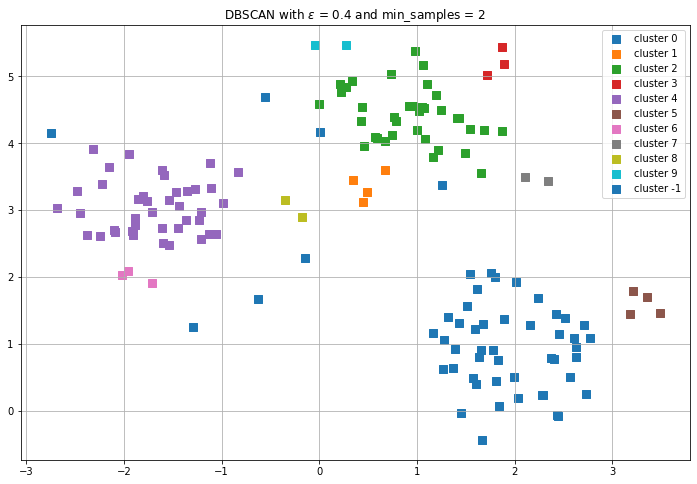

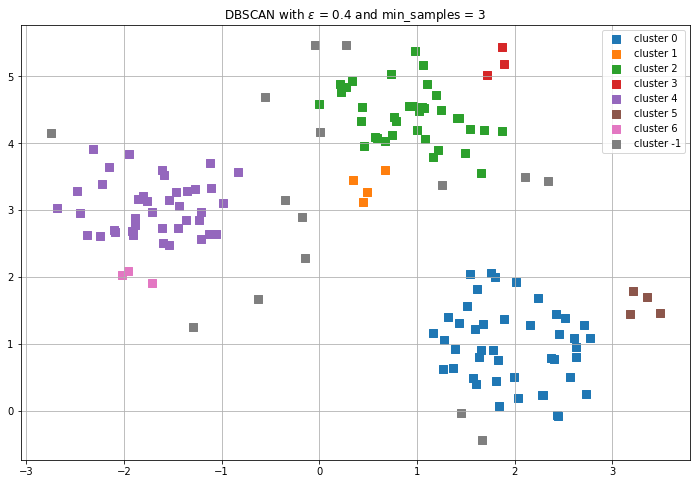

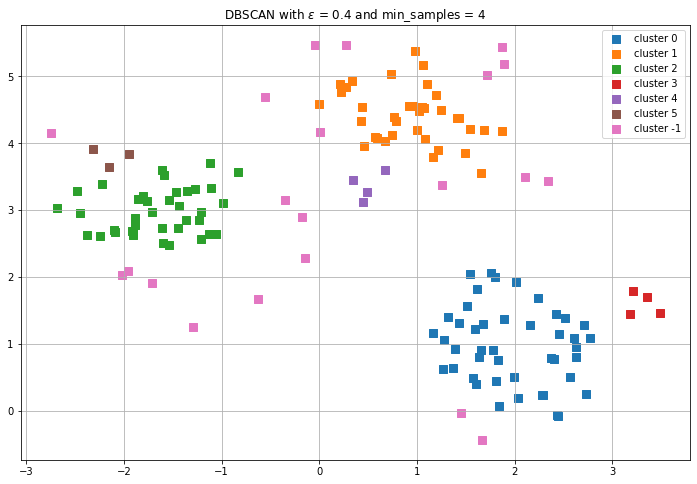

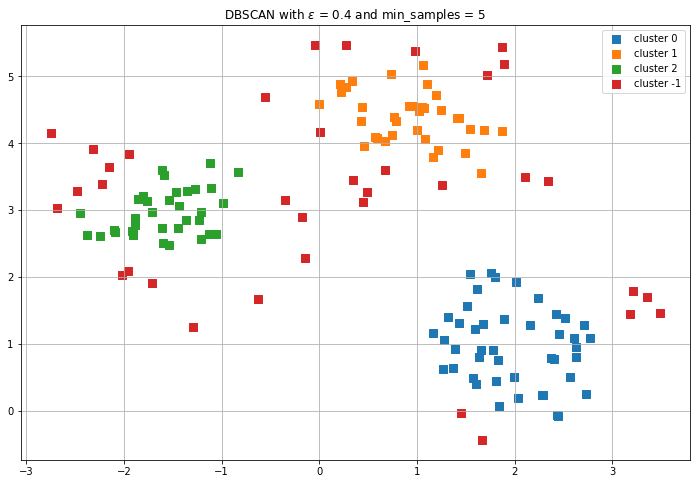

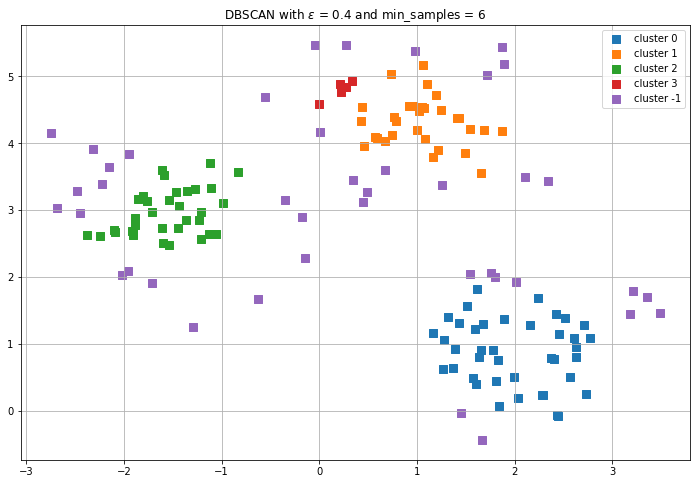

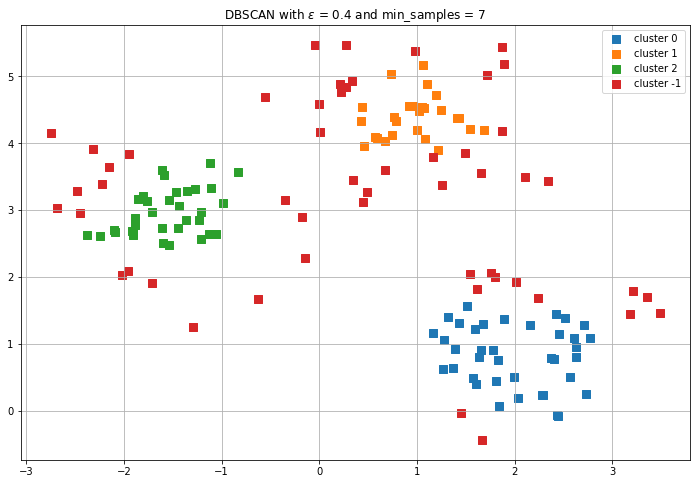

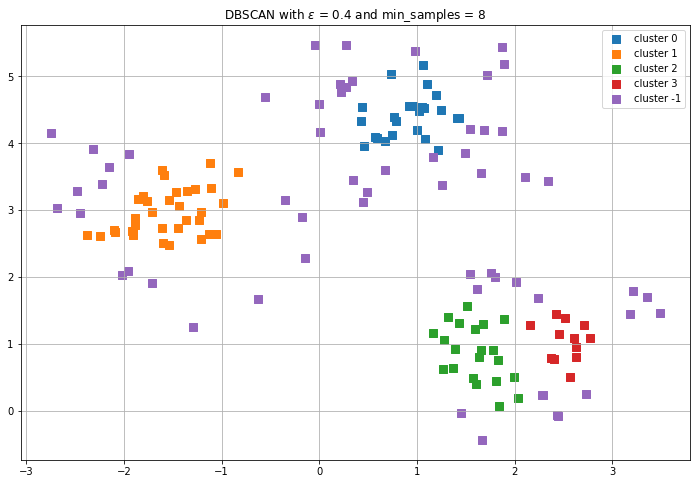

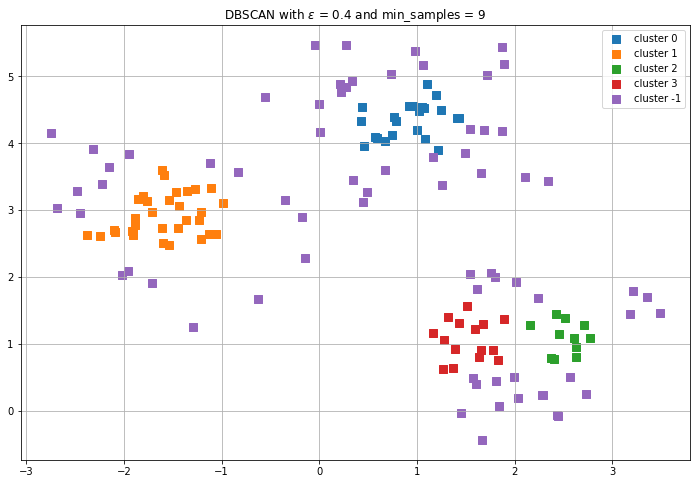

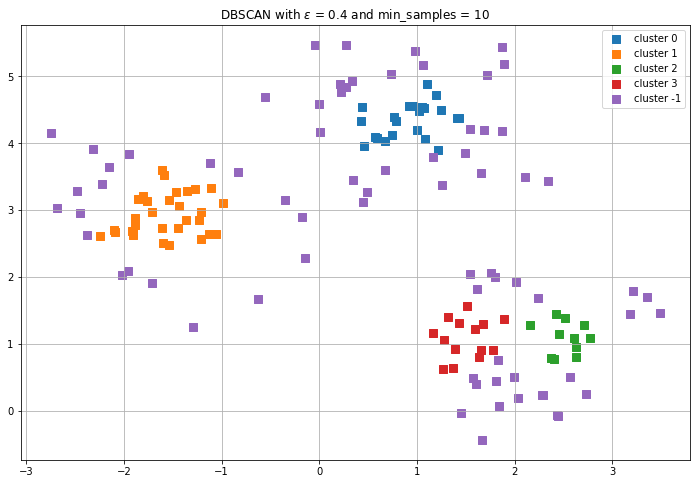

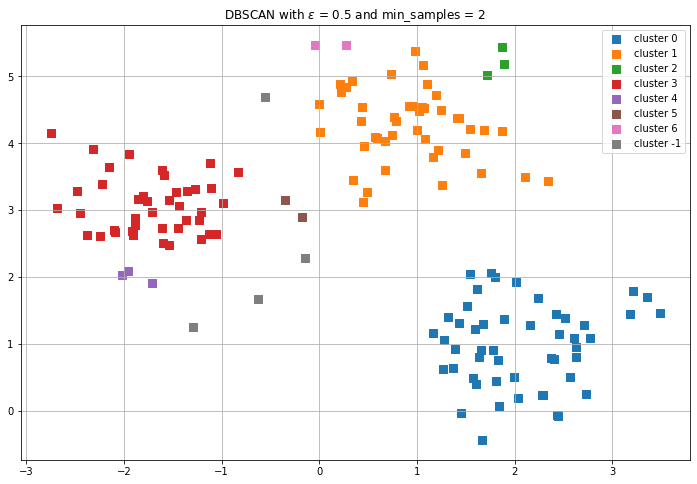

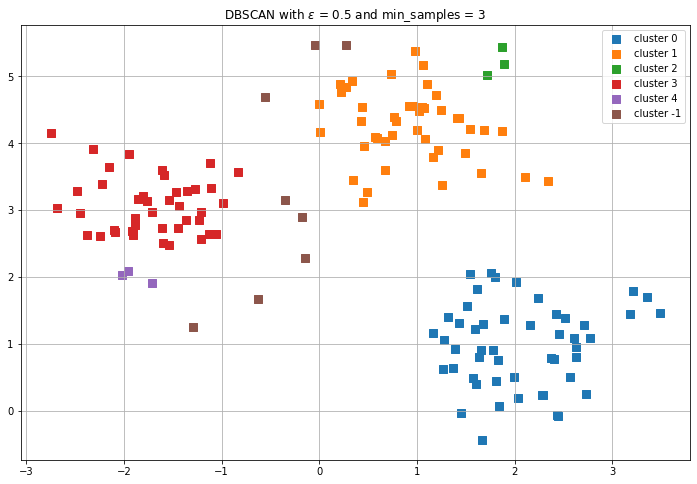

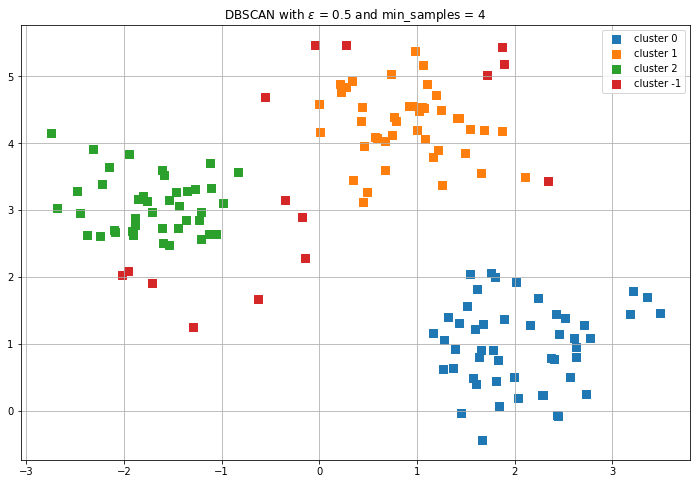

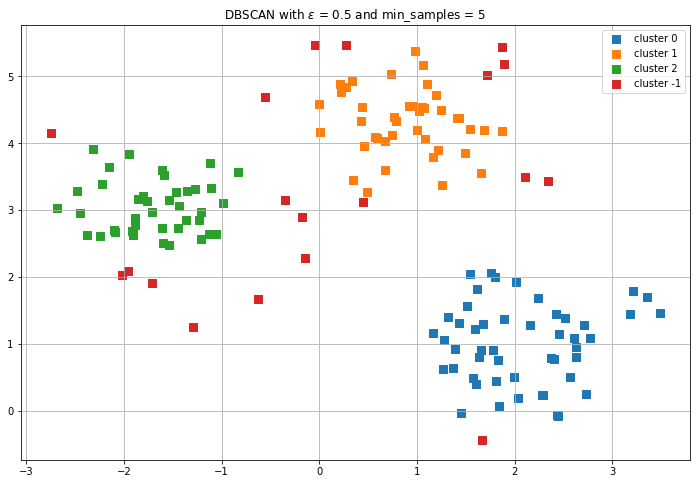

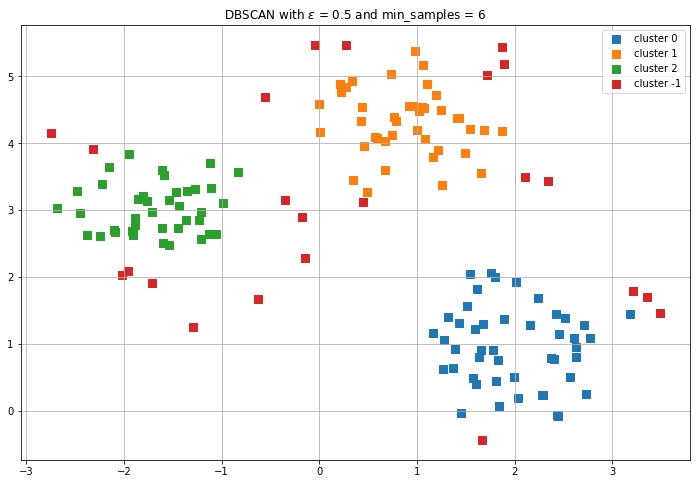

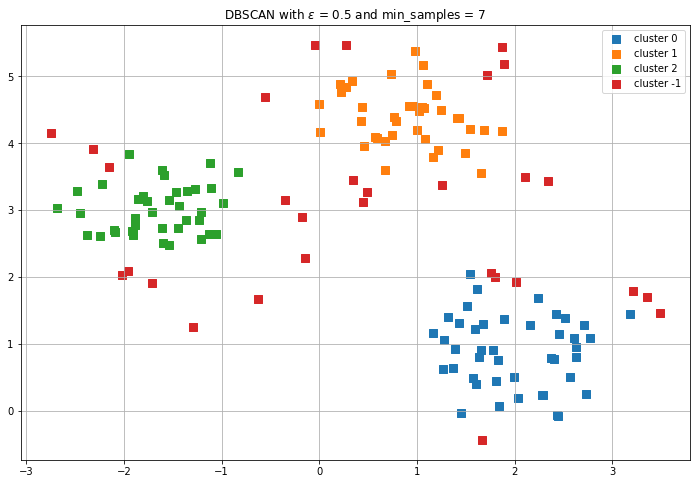

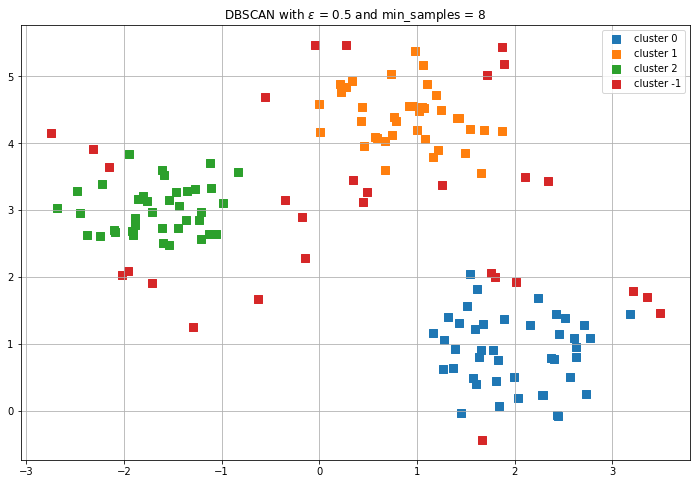

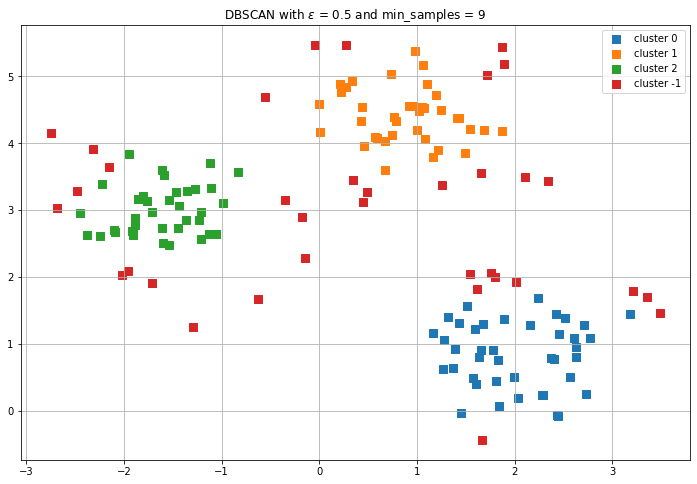

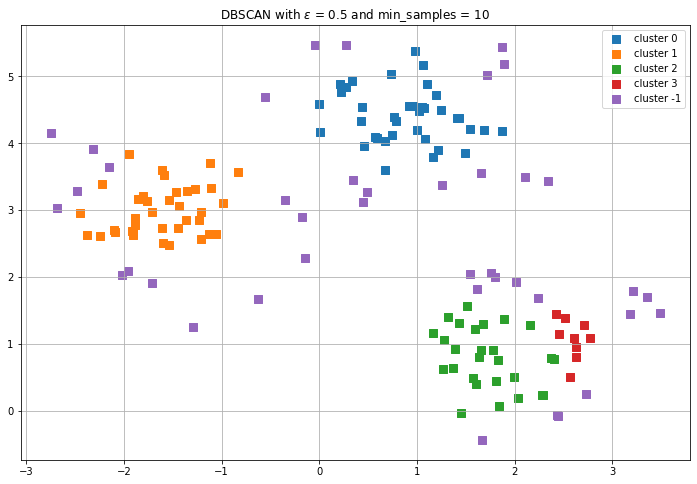

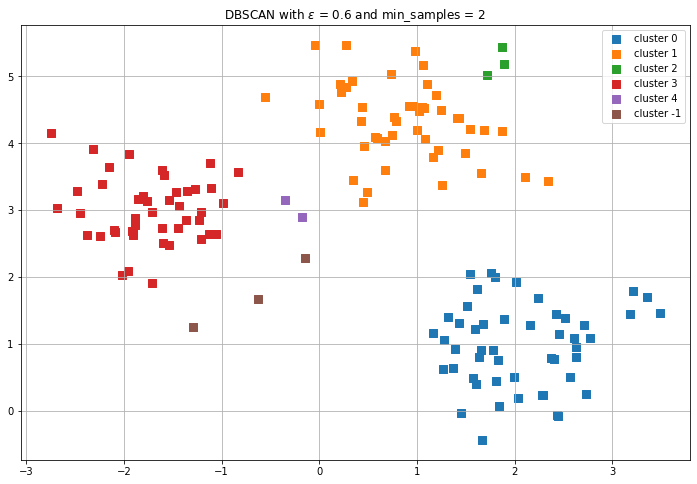

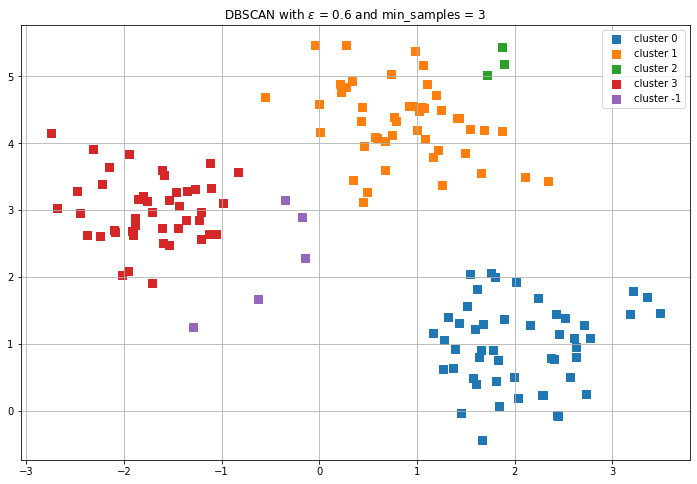

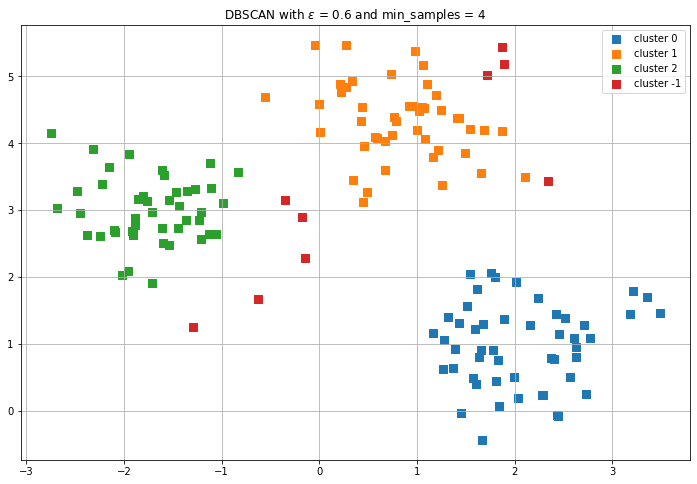

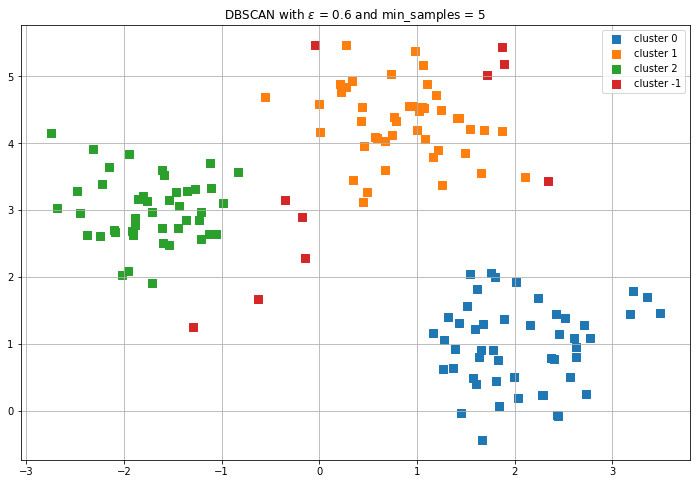

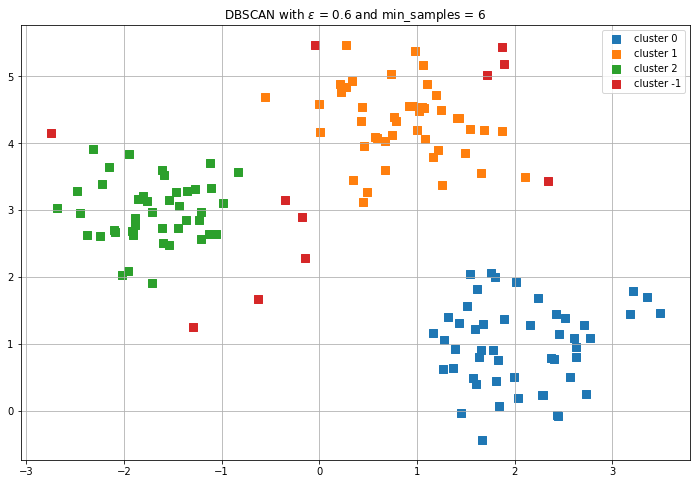

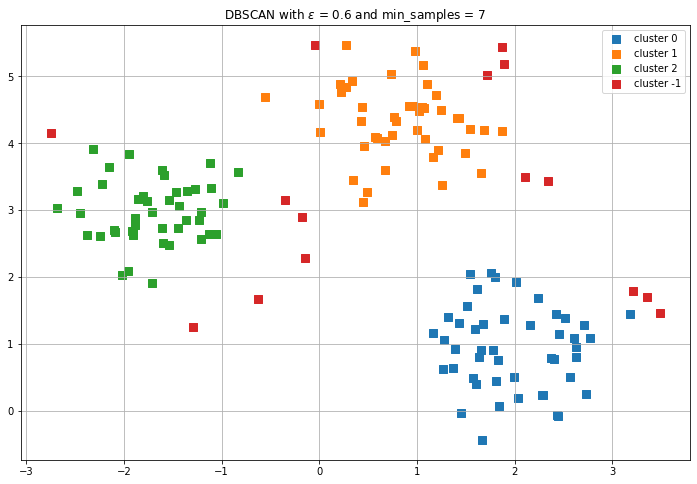

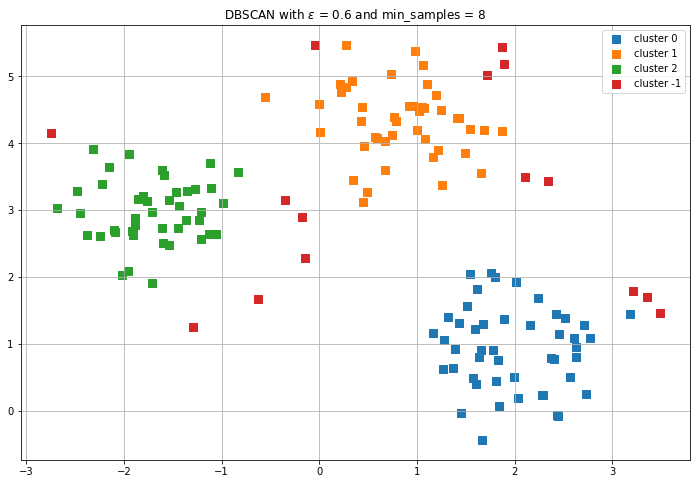

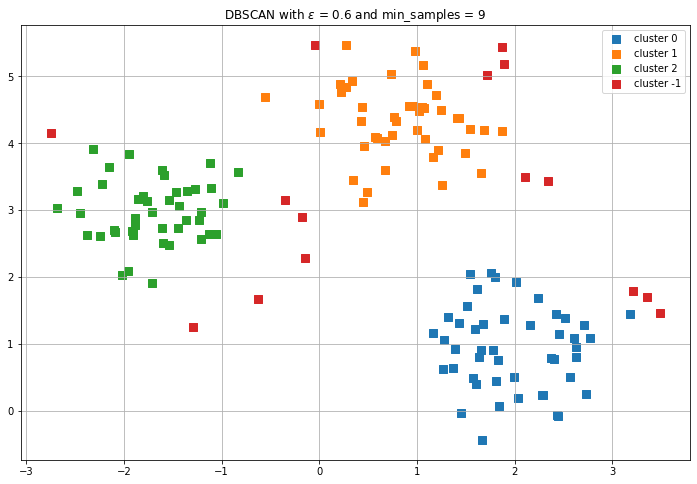

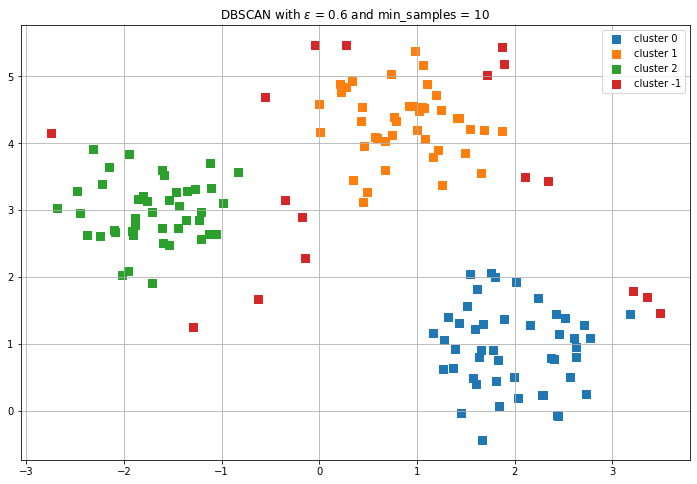

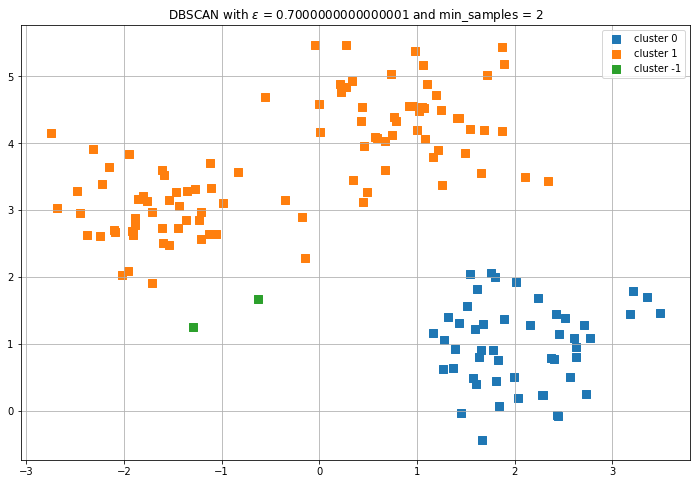

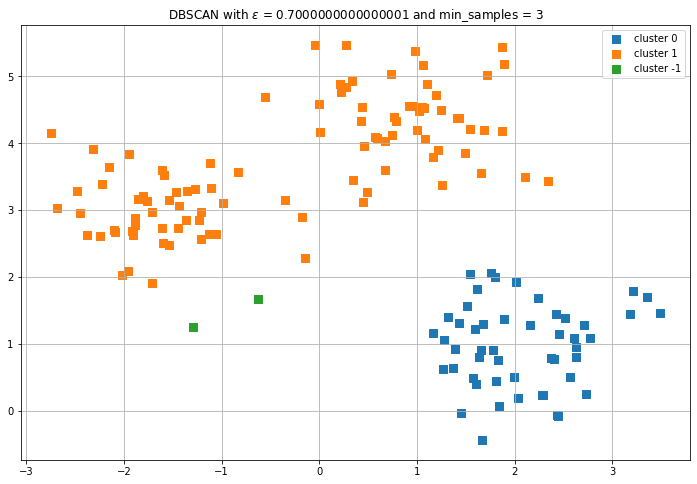

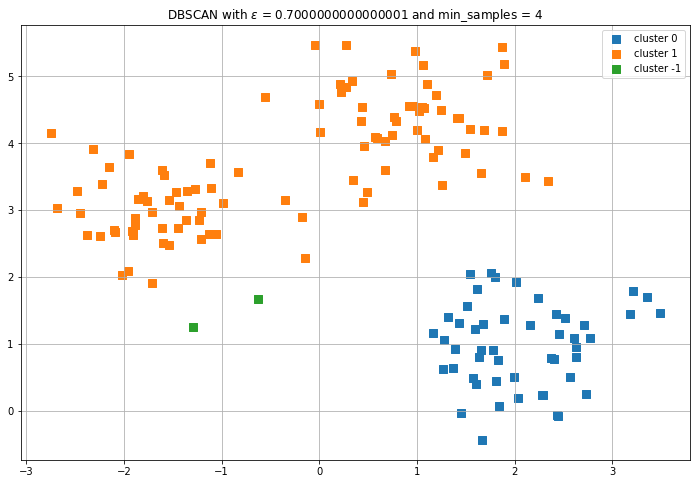

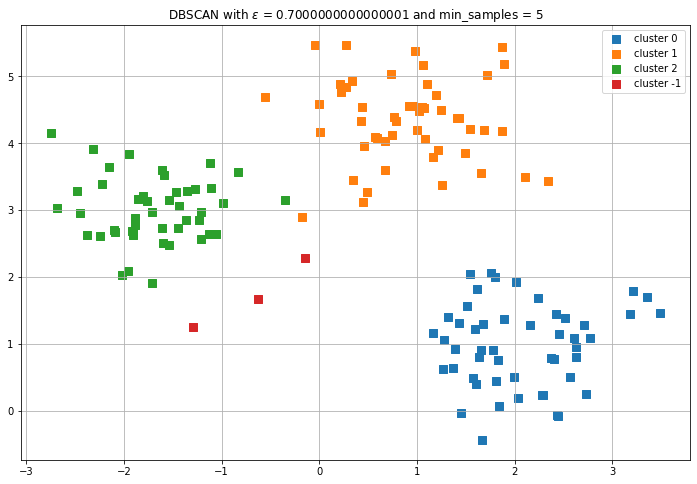

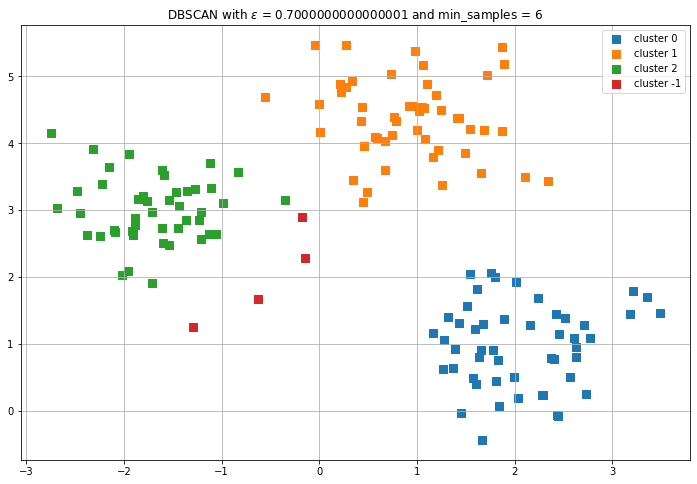

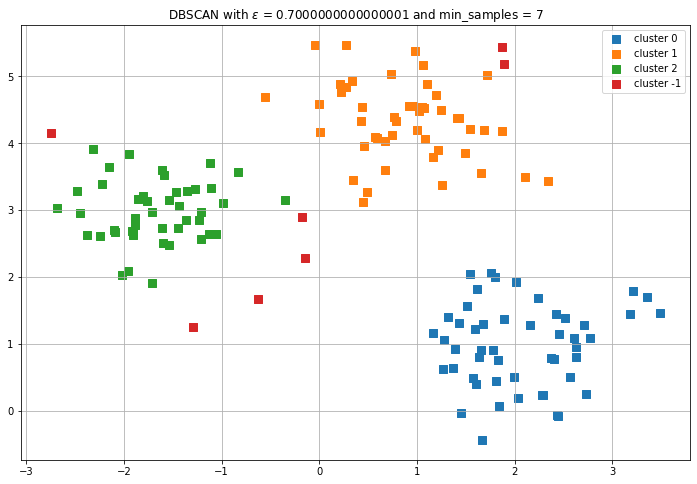

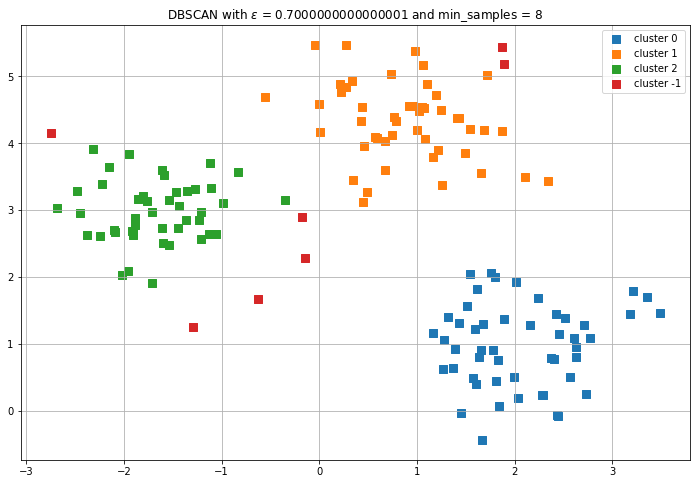

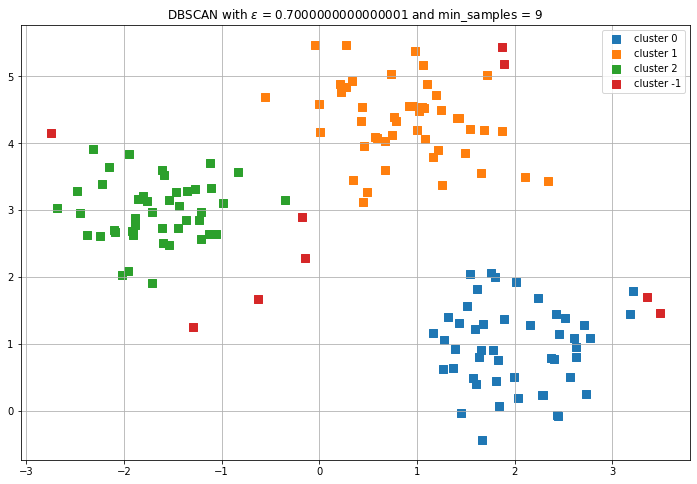

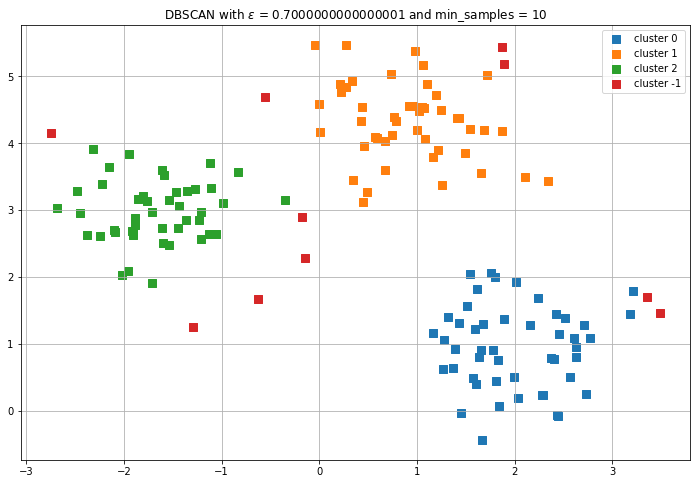

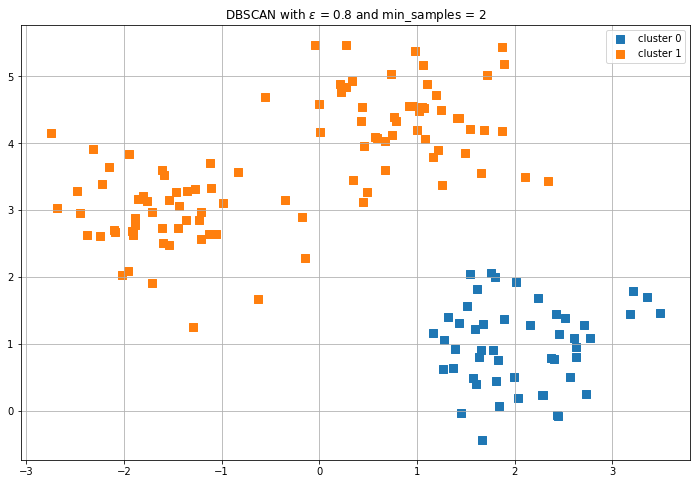

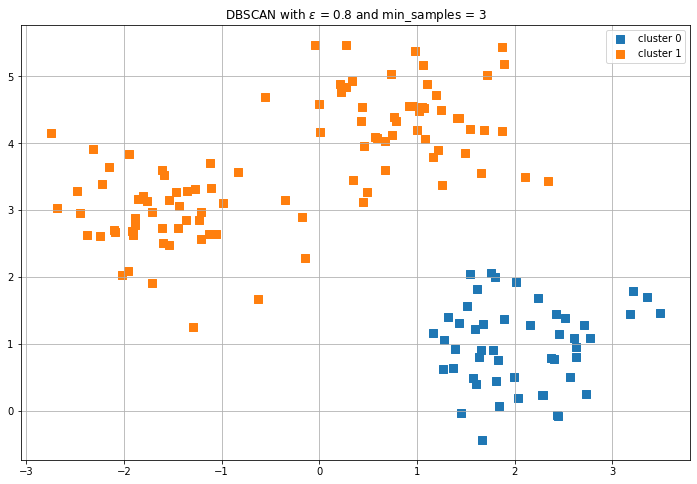

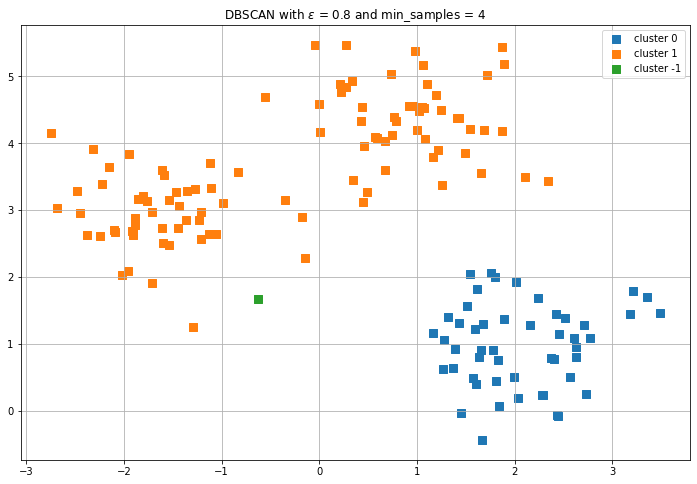

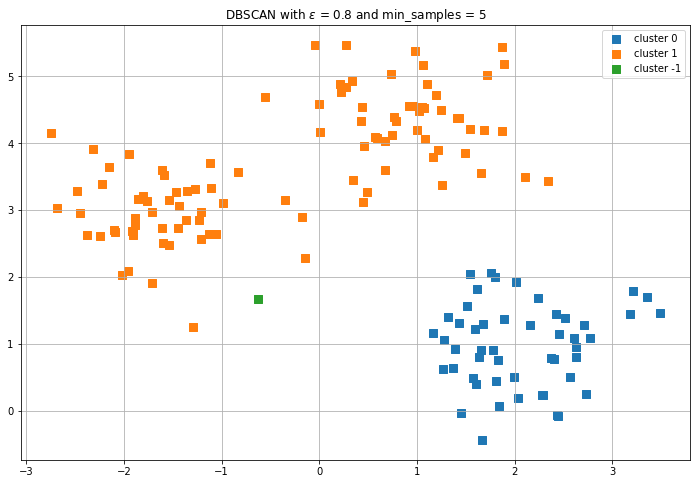

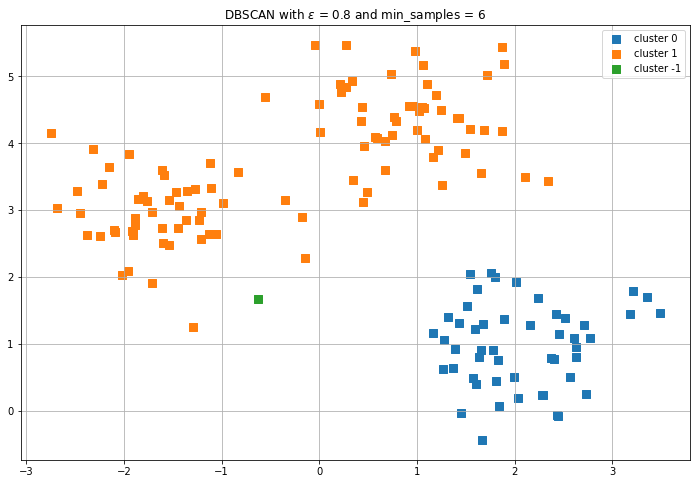

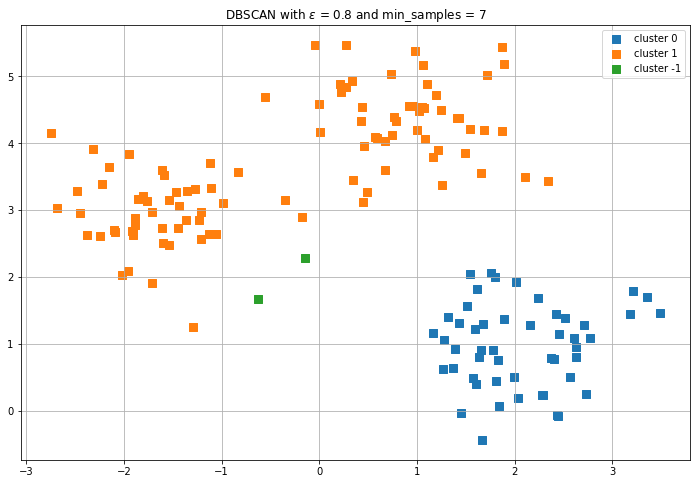

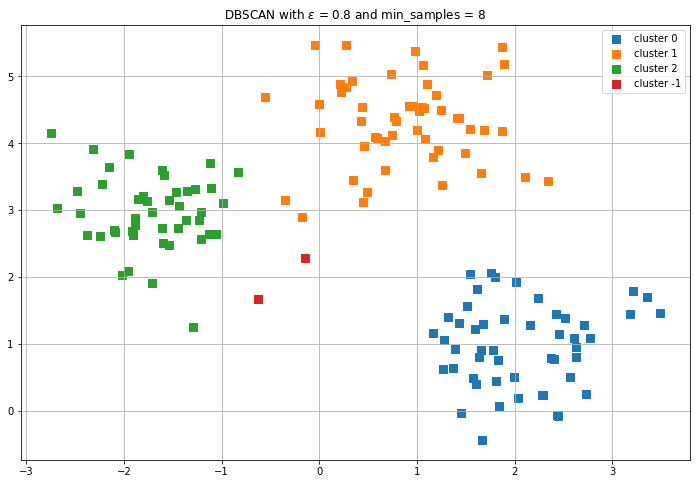

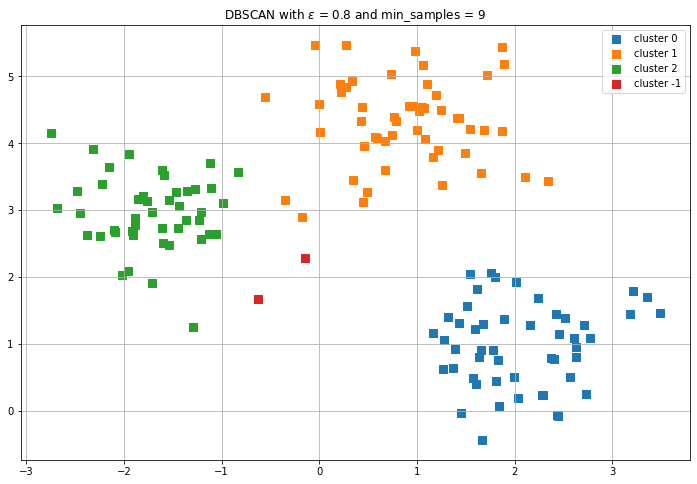

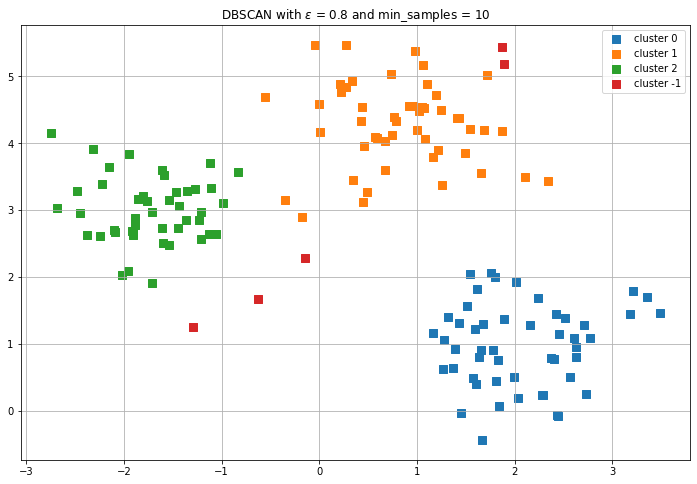

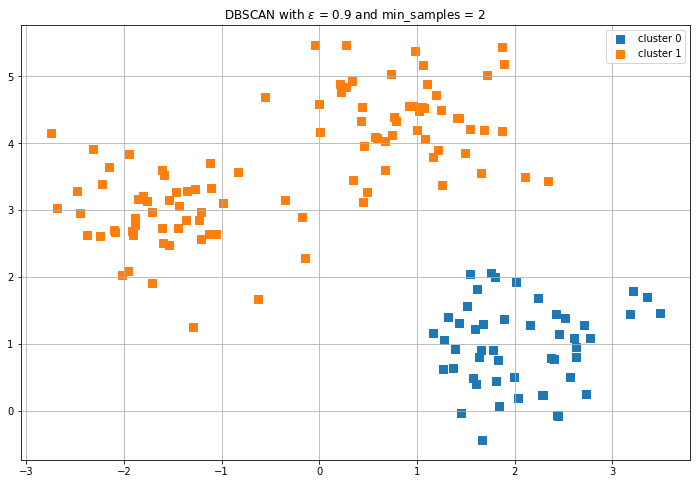

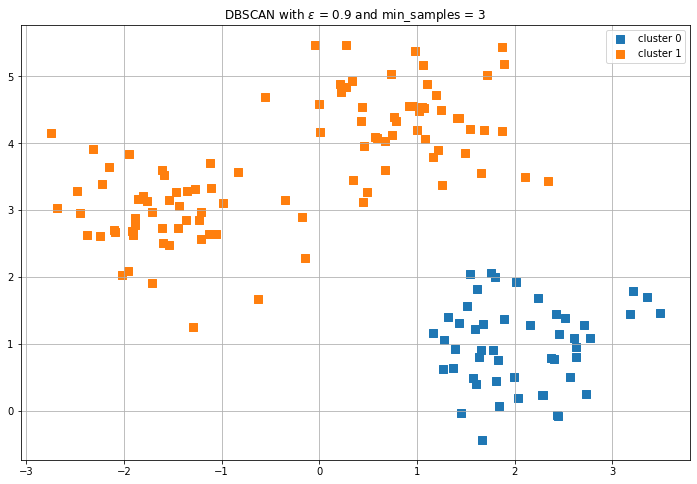

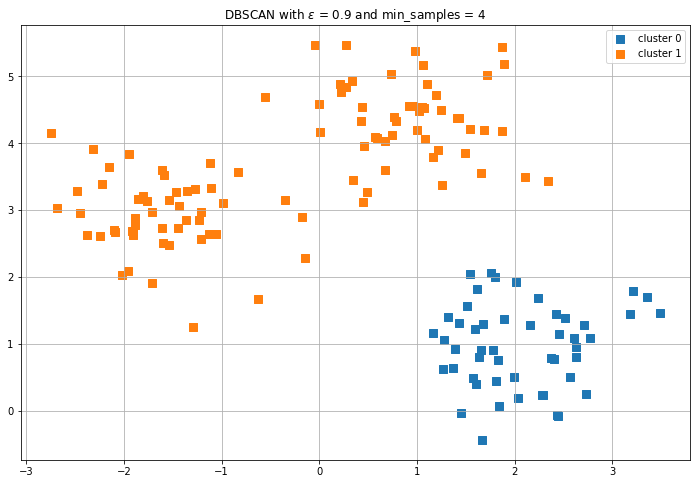

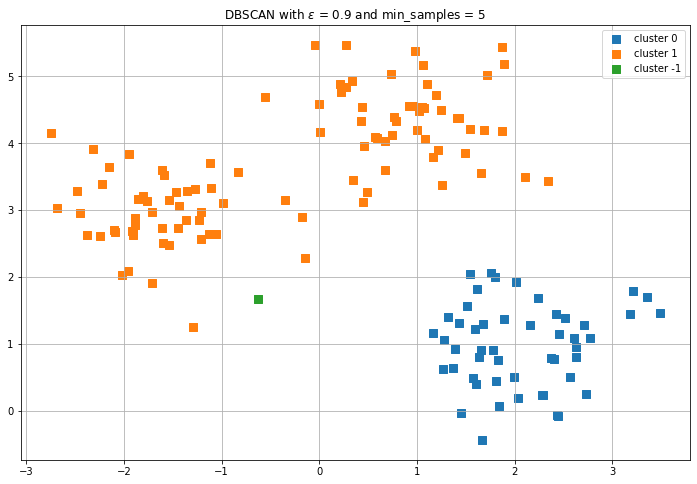

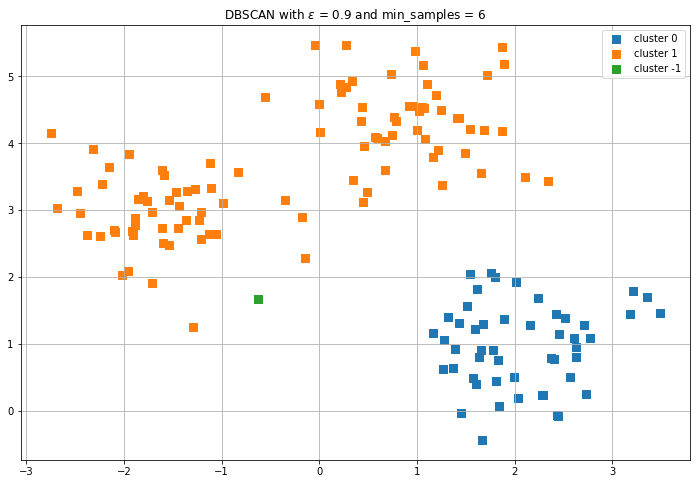

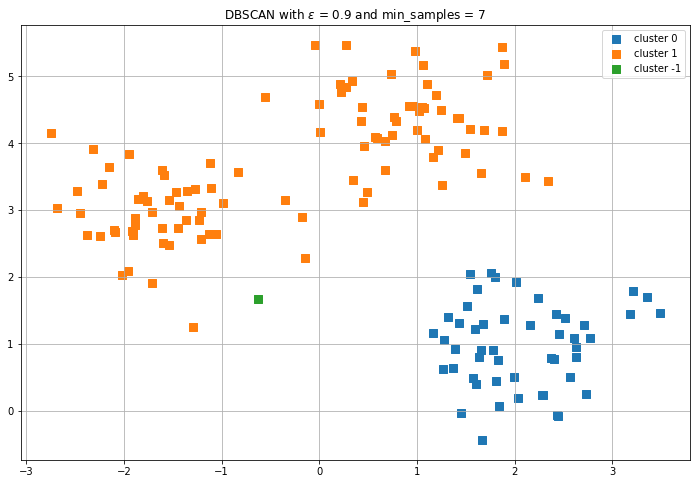

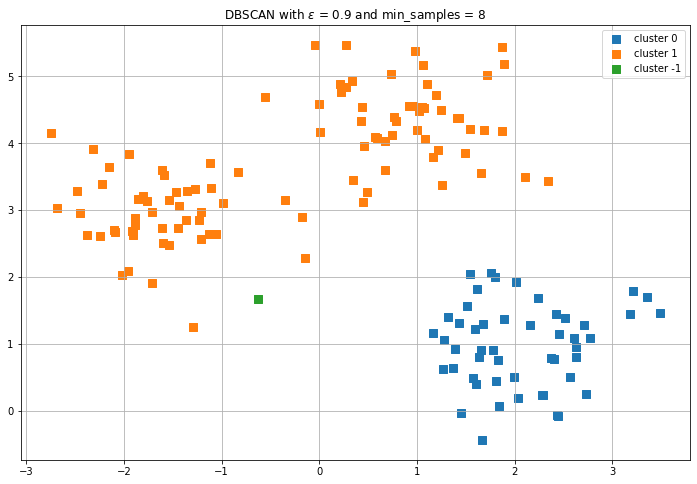

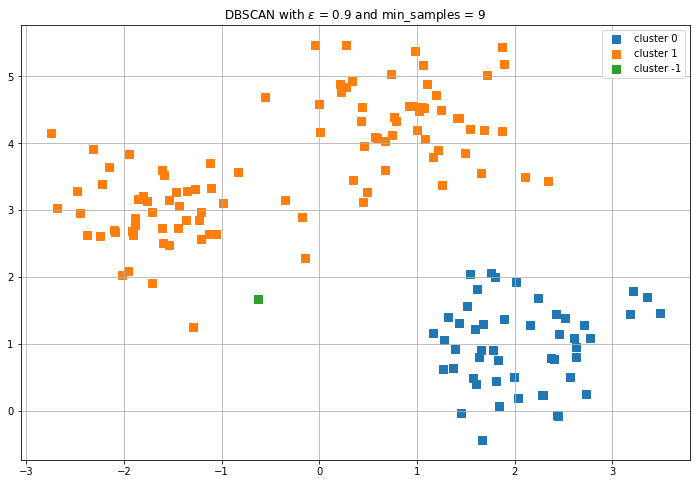

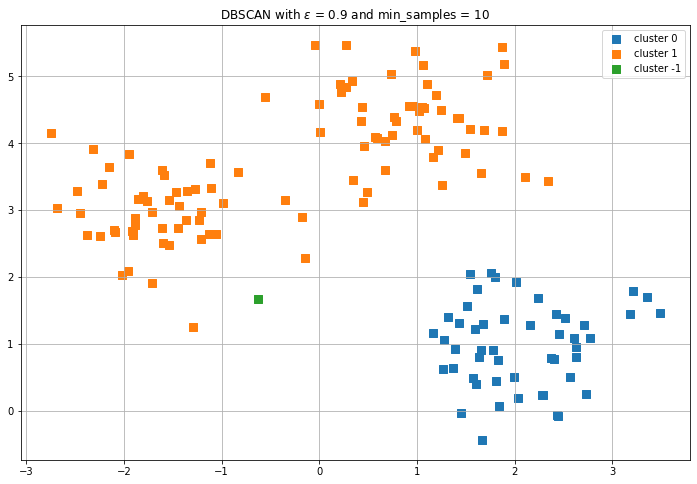

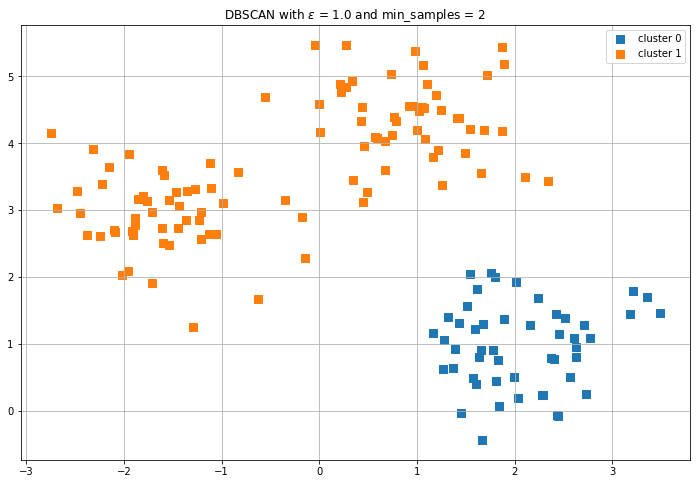

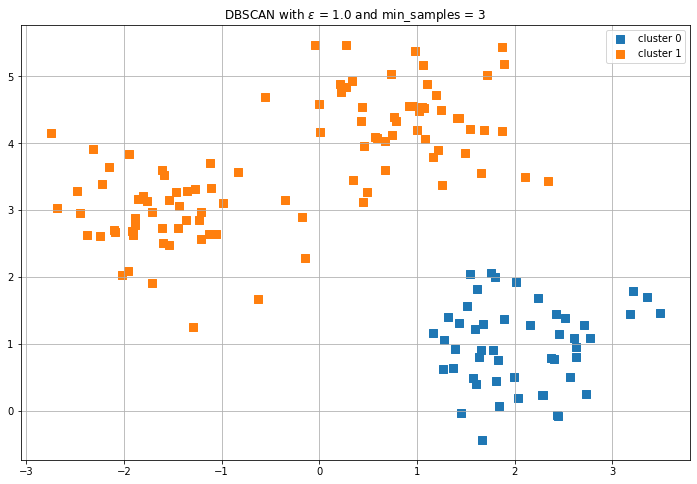

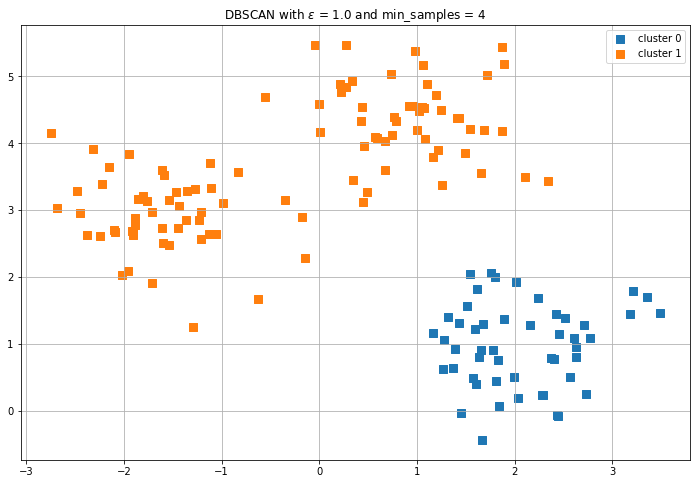

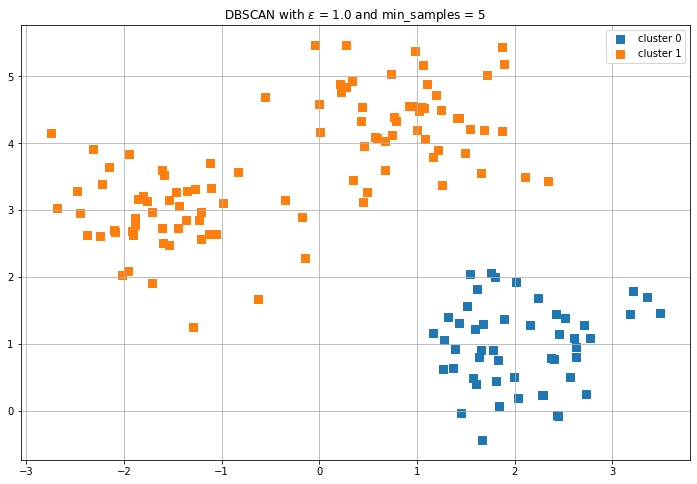

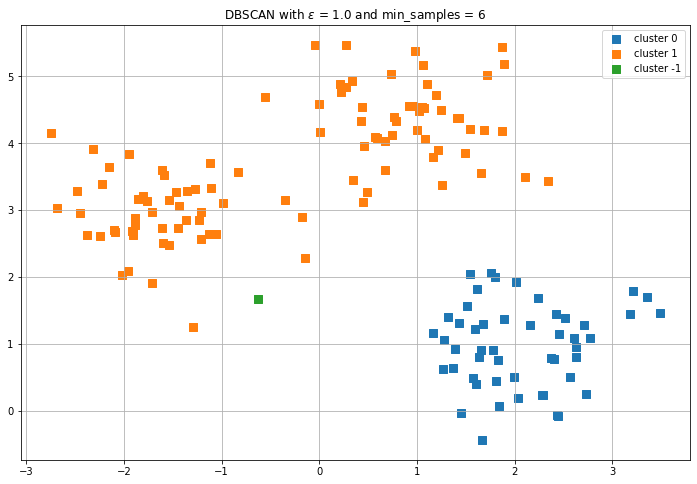

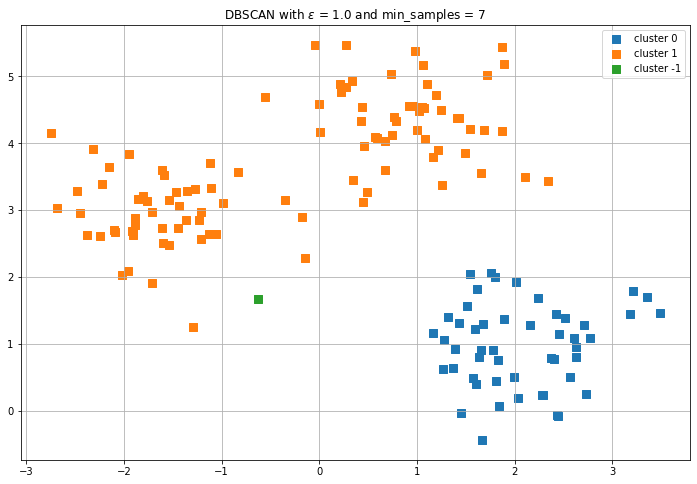

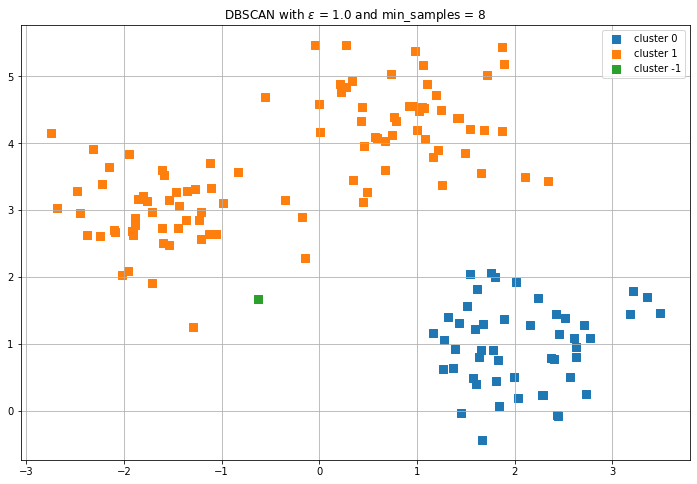

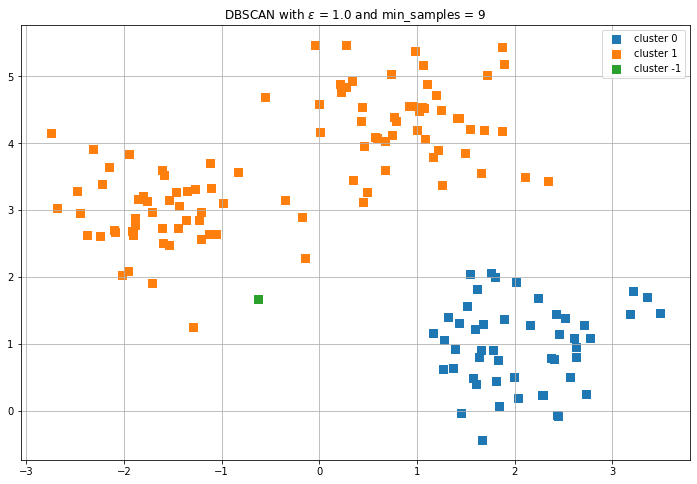

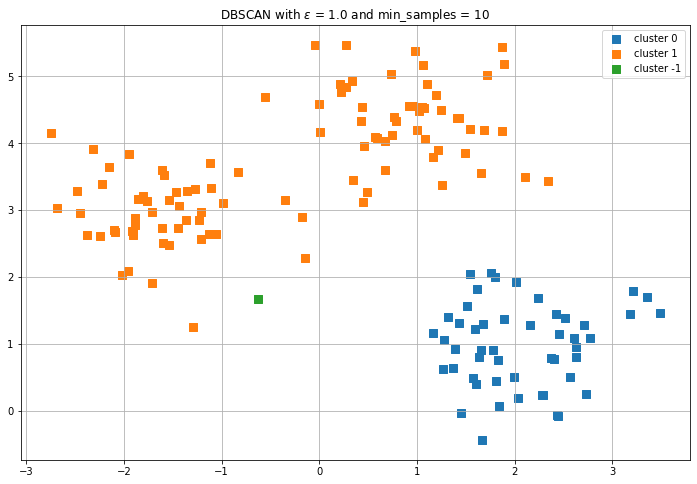

In [8]:
for r, size in product(radii, sizes):
    db = DBSCAN(eps = r, min_samples = size)
    y_db = db.fit_predict(X)
    plt.title(f'DBSCAN with $\epsilon$ = {r} and min_samples = {size}')
    plot_clusters(X,y_db)
    

Some candidates for the optimal (epsilon, min_samples) pairs are (0.5, 4), (0.6, 4), (0.7, 5) and (0.7, 6).  Let us look at them more closely.

In [9]:
candidates = [(0.5, 4), (0.6, 4), (0.7, 5), (0.7, 6)]

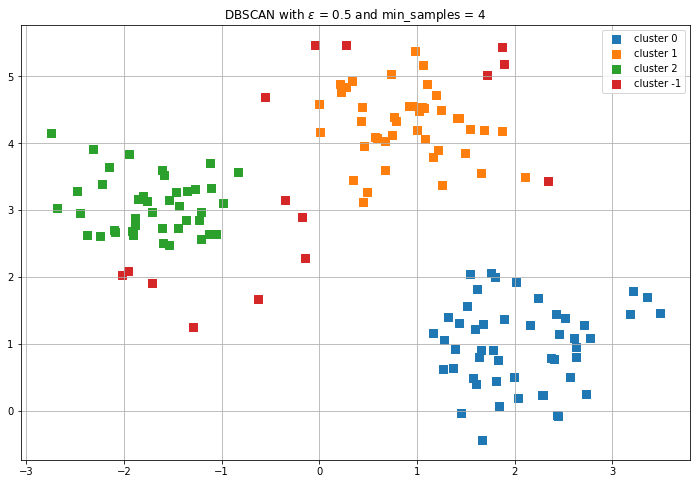

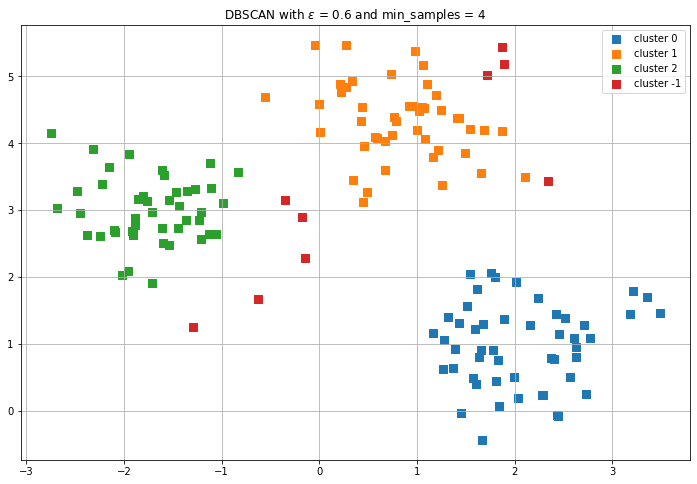

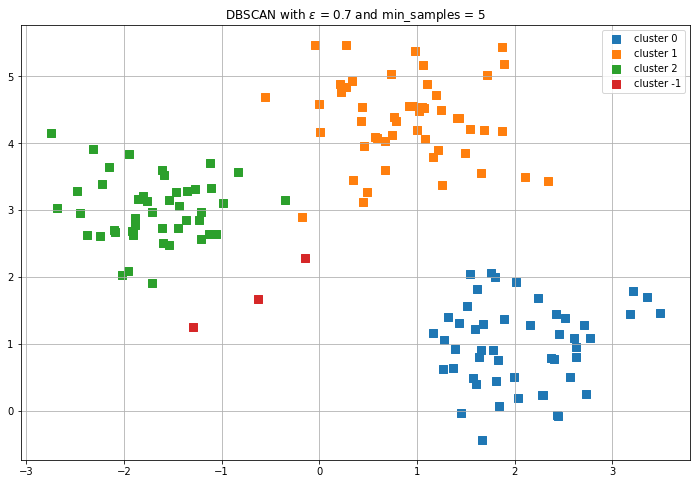

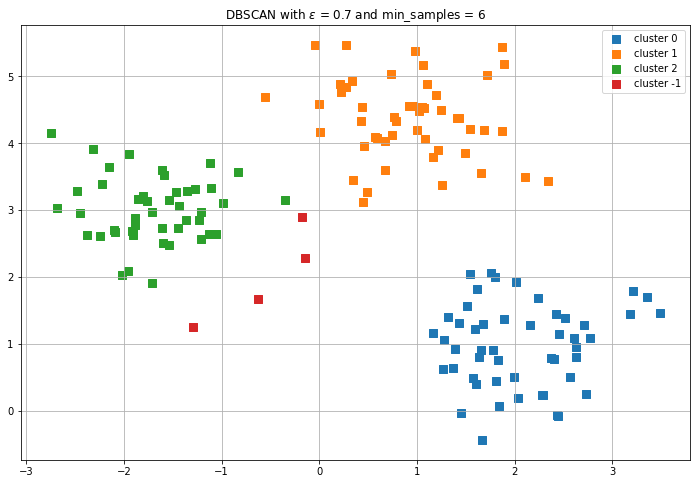

In [10]:
for c in candidates:
    db = DBSCAN(eps = c[0], min_samples = c[1])
    y_db = db.fit_predict(X)
    plt.title(f'DBSCAN with $\epsilon$ = {c[0]} and min_samples = {c[1]}')
    plot_clusters(X,y_db)

Of the 4 candidates, eps = 0.7 and min_samples = 6 seems like the 
best choice for the optimal setting for DBSCAN.